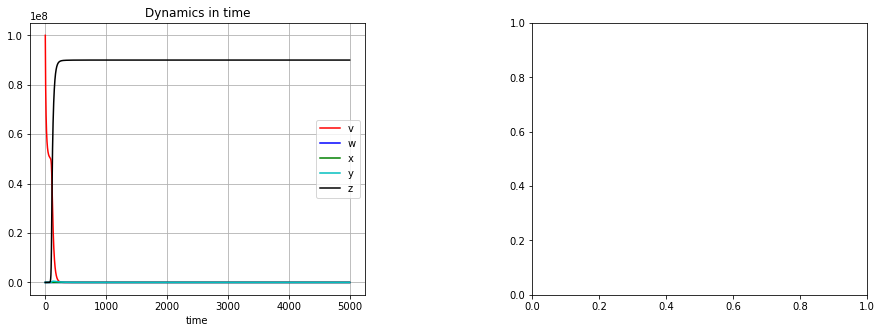

In [10]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate

# define the system in this way (asuming a predator-prey-system with no negative values)
# to avoid interference x = r (for resource) and y = c (for consumer)
k = 10**8
r_inc = 0.5
r = np.array([0.1+(r_inc*a) for a in range(5)])
d = r[0]/2
# r1 = 0.1
# r2 = 5
# d1 = 0.01
# d2 = 0.01

v, w, x, y, z = sm.symbols('v, w, x, y, z', negative=False)
V = r[0]*v*(k-v-w-x-y-z)/k - d*v
W = r[1]*w*(k-v-w-x-y-z)/k - d*w
X = r[2]*x*(k-v-w-x-y-z)/k - d*x
Y = r[3]*y*(k-v-w-x-y-z)/k - d*y
Y = r[4]*z*(k-v-w-x-y-z)/k - d*z

# use sympy's way of setting equations to zero
# XEqual = sm.Eq(X, 0)
# YEqual = sm.Eq(Y, 0)

# # compute fixed points
# equilibria = sm.solve( (XEqual, YEqual), x, y )
# print(equilibria)

# define the system in numpy arrays
def Sys(X, t=0):
    # here X[0] = x and x[1] = y
    r = np.array([0.1+(0.1*a) for a in range(5)])
    d = r[0]/2
    return np.array([ r[0]*X[0]*(k - X.sum())/k - d*X[0], r[1]*X[1]*(k - X.sum())/k - d*X[1], r[2]*X[2]*(k - X.sum())/k - d*X[2], r[3]*X[3]*(k - X.sum())/k - d*X[3], r[4]*X[4]*(k - X.sum())/k - d*X[4] ])

# quiver plot
# fig2 = plt.figure(figsize=(10,8))
# ax4 = fig2.add_subplot(1,1,1)

# x = np.arange(0,k*1.5)
# y = np.arange(0,k*1.5)

# plot nullclines
# ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline')
# ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

# fp = equilibria
# plot fixed points
# for point in fp:
#     ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
# ax4.set_title("Quiverplot with nullclines")
# ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
# x = np.linspace(0, k, 25)
# y = np.linspace(0, k, 25)

# X1 , Y1  = np.meshgrid(x, y)                    # create a grid
# DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
# M = (np.hypot(DX1, DY1))                        # norm growth rate 
# M[ M == 0] = 1.                                 # avoid zero division errors 
# DX1 /= M                                        # normalize each arrows
# DY1 /= M

# ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
# # ax4.legend()
# ax4.grid()


# generate 1000 linearly spaced numbers for x-axes
t = np.arange(0, 5000)
# initial values: x0 = k, y0 = 1
Sys0 = np.array([k, 1, 1, 1, 1])

# # define the system in numpy arrays
# def Sys(X, t=0):
#     k = 10000
#     # here X[0] = x and x[1] = y    
#     return np.array([ r1*X[0]*(k - X[0] -X[1])/k , r2*X[1]*(k - X[0] -X[1])/k ])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
I, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
infodict['message']                      # integration successful

v, w, x, y, z = I.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(v, 'r-', label='v')
ax1.plot(w, 'b-', label='w')
ax1.plot(x, 'g-', label='x')
ax1.plot(y, 'c-', label='y')
ax1.plot(z, 'k-', label='z')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

# ax2.plot(x, y, 'b-')
# ax2.set_xlabel("x")
# ax2.set_ylabel("y")  
# ax2.set_title("Phase space")
# ax2.grid()

- When r1 and r2 < 1:
    - When r1 is large and d1 is small (three orders of magnitude or less), selective sweeps are rare, with limited replacement of x with y occurring only for very small values of x (in the phase plane). If starting from x0 = k and y0 = 1, y never grows sufficiently within the timeframe of 1500 time steps. This can be observed when:
        - r1 = 0.1
        - r2 = 0.5
        - d1 = d2 = 0.001
        - k = 10^8
    
    - When r1 is about two orders of magnitude larger than d1, selective sweeps are much more likely within the given timeframe.
        - r1 = 0.1
        - r2 = 0.5
        - d1 = d2 = 0.01
        - k = 10^8

- When r1 and r2 > 1:
    - The effect of the gap between r1 and d1 remains the same qualitatively; more than three orders of magnitude higher r1 leads to negligible competitive growth of y over x.
        - r1 = 1
        - r2 = 5
        - d1 = d2 = 0.001
        - k = 10^8

- When r1 < 1:
    - Even if r1 exceeds d1 by a large margin making death in x insignificant, large enough values of y can still invade x population and grow to a substantial degree, and to complete replacement, as shown by the phase plane.
        - r1 = 0.1
        - r2 = 5
        - d1 = d2 = 0.001
        - k = 10^8
    
    - When the gap between r1 and d1 is reduced, competitive exclusion of x occurs much earlier.
        - r1 = 0.1
        - r2 = 5
        - d1 = d2 = 0.01
        - k = 10^8

## Multiple mutant populations
- Deterministic dynamics of multiple cell populations do not give straightforward inferences that translate into biologically-meaningful observations. For the same range of growth rate and roughly the same carrying capacity as in the stochastic `cell-competition-model` code, the final steady state of the system depends strongly on the initial conditions. Starting with the five populations being [k, 1, 0, 0, 0], population `w` invades and replaces population `v`, and no further change is seen. If the initial condition is [k, 1, 1, 1, 1] instead, the last population, `z` predictably takes over the entire carrying capacity as it has the highest growth rate. The system underlying this behaviour can be described as below:
``` 
    r = np.array([0.1+(r_inc*a) for a in range(5)])
    d = r[0]/2
    V = r[0]*v*(k-v-w-x-y-z)/k - d*v
    W = r[1]*w*(k-v-w-x-y-z)/k - d*w
    X = r[2]*x*(k-v-w-x-y-z)/k - d*x
    Y = r[3]*y*(k-v-w-x-y-z)/k - d*y
    Y = r[4]*z*(k-v-w-x-y-z)/k - d*z
```

- It might be possible to introduce some stochasticity to the onset of mutant populations based on the Poisson process and related inter-arrival times.